In [1]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [4]:
from collections import Counter
import re

In [20]:
df  = pd.read_csv('mycsvfile3.csv', names = ['job_id','rating', 'position', 'company', 'job_city', 'job_state_code',
         'sal_low', 'sal_high', 'link','description','hq_city','hq_state_code','size','industry'])
df.sample(5)

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,link,description,hq_city,hq_state_code,size,industry
1192,2685836453,3.6,director of data science,Quicken Loans,Detroit,MI,64.0,99.0,https://www.glassdoor.com/partner/jobListing.h...,"['professionally.', 'commitment', 'ranked', 'o...",Detroit,MI,['10000'],Finance
718,2816384137,3.5,data scientist,Fanatics,San Mateo,CA,100.0,139.0,https://www.glassdoor.com/partner/jobListing.h...,"['nhl', 'longhorns', 'mls', 'retailer', 'capab...",Jacksonville,FL,"['1001', '5000']",Retail
2224,2814013511,5.0,senior data scientist,Tonal,San Francisco,CA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"['fitness', 'fallen', 'artificial', 'systems',...",SanFrancisco,CA,"['51', '200']",ConsumerServices
3205,2829692046,4.8,sr. data scientist,Branch,Redwood City,CA,187.0,263.0,https://www.glassdoor.com/partner/jobListing.h...,"['from.', 'user', 'educations', 'systems', 'ba...",RedwoodCity,CA,"['51', '200']",InformationTechnology
3203,2845693475,3.4,cloud data scientist - big data platform team ...,Oracle,Washington,DC,86.0,128.0,https://www.glassdoor.com/partner/jobListing.h...,"['analytics', 'problem', 'these', 'all', 'tech...",RedwoodCity,CA,['10000'],InformationTechnology


In [312]:
df.columns

Index(['job_id', 'rating', 'position', 'company', 'job_city', 'job_state_code',
       'sal_low', 'sal_high', 'link', 'description', 'hq_city',
       'hq_state_code', 'size', 'industry', 'sal_mid'],
      dtype='object')

In [22]:
df.dtypes

job_id              int64
rating            float64
position           object
company            object
job_city           object
job_state_code     object
sal_low           float64
sal_high          float64
link               object
description        object
hq_city            object
hq_state_code      object
size               object
industry           object
dtype: object

In [23]:
df.shape # observations, features

(4540, 14)

In [24]:
##'rating', 'position', 'company'

In [25]:
print(df.rating.unique())
np.min(df.rating), np.max(df.rating)

[ 4.8  3.   4.4  3.6  4.   5.   3.5  3.7  nan  3.2  3.4  3.3  3.8  3.9  2.9
  4.9  4.1  4.6  4.2  2.3  4.3  2.5  3.1  4.5  4.7  1.   2.8  2.7  2.   2.6
  1.5  2.4  1.9  1.7  2.2  2.1  1.3]


(1.0, 5.0)

In [26]:
print(df.position.unique())
len(df.position.unique())

['jr. data analyst - seattle, wa' 'scientist' 'data scientist, engineering'
 ..., 'machine learning / data scientist'
 'sr software engineer - data science'
 'machine learning engineer, recommendations']


2464

In [27]:
print(df.company.str.lower().unique()) 
len(df.company.str.lower().unique())

['avid technical resources' 'perspecta' 'google' ..., 'airpr' 'vida'
 'pitchbook data, inc.']


2115

In [28]:
#'job_city', 'job_state_code','sal_low', 'sal_high', 'link', 'description'

In [144]:
#print(df.job_city.unique())
len(df.job_city.unique())

300

In [30]:
print(df.job_state_code.unique())
len(df.job_state_code.unique())

['WA' 'VA' 'CA' 'MA' 'TX' 'ND' 'NY' 'IL' 'UT' 'DC' 'MI' 'OH' 'MO' 'NJ' 'GA'
 'CT' 'PA' 'MD' 'FL' 'Fairfax' 'CO' nan 'OR' 'TN' 'AZ' 'NC' 'NV' 'NM' 'VT'
 'IN' 'IA' 'DE' 'KY' 'LA' 'MN' 'NE' 'ID' 'AL' 'WI' 'NH' 'Kenton' 'SD']


42

In [31]:
print(df.sal_low.unique())
np.min(df.sal_low),np.max(df.sal_low), len(df.sal_low.unique())

[  nan  131.  103.  120.   98.   58.   93.  137.  113.   88.   41.  110.
  154.   31.  123.   56.   72.  109.   97.   90.  128.   54.   89.   51.
   67.  107.  158.  119.   76.  111.  117.  141.   46.   95.   79.  121.
   64.  130.  112.   52.   99.   83.   48.   71.   63.   44.   36.  138.
   49.  100.   77.   84.   53.   96.   85.  102.  108.   62.  153.  126.
   70.   50.  148.   43.  164.  186.  129.  147.   74.   86.  106.   68.
  125.   61.  167.   60.   81.   94.   57.   82.   78.  132.   30.  133.
  150.   75.   45.   91.  136.  139.  169.  105.   92.  101.   87.  116.
  140.   80.  161.   59.  124.  157.  115.   65.  149.  134.  181.  145.
  142.   69.   47.  162.   73.  104.   32.  160.  151.  114.  118.  165.
   40.   55.  187.  135.  201.  127.  144.  174.  209.  143.  155.   42.
   66.   37.   33.   34.  175.  185.  122.  163.   29.  152.  207.  204.
  179.   39.   38.  171.  159.  166.   25.  146.  177.  173.  180.  192.
  188.  206.   35.  170.  193.  182.  210.  205.  1

(25.0, 218.0, 171)

In [32]:
print(df.sal_high.unique())
np.min(df.sal_high),np.max(df.sal_high), len(df.sal_high.unique())

[  nan  190.  154.  169.  139.   91.  134.  193.  142.  160.  120.   61.
  161.  206.   50.  176.   82.  103.  149.  128.  182.   84.  131.  152.
  148.   71.  105.  153.  222.  175.   88.  164.  171.  199.   80.  168.
   90.  129.   74.  141.  109.   94.  115.   66.   58.  165.  111.   85.
  113.   87.  100.  151.  116.  155.  163.  147.  156.  157.  140.  106.
  101.  150.  216.  184.   76.  211.  138.  121.  231.  261.  187.  185.
  208.  104.  126.   99.  117.  167.  179.  132.   77.   79.  235.  122.
   96.  119.  191.  210.   56.  144.  220.   92.  162.   98.  143.  124.
  110.  170.   81.  172.   86.   72.  123.  178.  136.   97.  158.  180.
  181.   89.  145.  227.  112.  133.  213.  188.  127.  205.  204.  202.
  108.  102.   75.  232.  135.  214.  217.   55.  137.  159.  186.  173.
  174.  107.  118.   63.   93.   95.  146.   52.  234.  243.  125.   64.
  203.   65.   70.  201.  183.  226.  114.  189.   73.  221.   83.   78.
  239.  192.  200.  218.  130.   62.   59.  198.   

(40.0, 297.0, 221)

In [33]:
#'hq_city','hq_state_code', 'size', 'industry'

In [34]:
print(df.hq_state_code.unique())
len(df.hq_state_code.unique())

['MA' 'VA' 'CA' 'France' 'GA' 'DC' 'NY' 'TX' 'Canada' 'WA' 'IL'
 'UnitedKingdom' 'Sweden' 'MD' 'UT' 'Israel' 'MI' 'MO' 'NJ' 'OH' 'FL'
 'Switzerland' 'HongKong' '061' 'India' 'CT' 'WI' 'NC' 'Finland' 'IN' 'CO'
 'PA' 'AZ' 'Singapore' 'Germany' 'TN' 'SouthKorea' 'MN' 'OR' 'Australia'
 'Ireland' 'KS' 'Netherlands' 'RI' 'DE' 'Barbados' 'KY' 'OK' 'AR' 'NM' 'VT'
 'Poland' 'WV' 'WA(US)' 'SaudiArabia' 'China' 'LA' 'AK' 'NE' 'Denmark'
 'CA(US)' 'Japan' 'Russia' 'Bermuda' 'Seychelles' 'ID' 'Greece' 'NY(US)'
 'ME' 'Spain' 'SC' 'PR' '133' 'HI' 'NH' 'NV' 'Man' 'SD' 'Austria']


79

In [145]:
#print(df.hq_city.unique())
len(df.hq_city.unique())

484

In [146]:
print(df['size'].unique()) 
len(df['size'].unique())

["['51', '200']" "['10000']" "['201', '500']" "['1001', '5000']"
 "['1', '50']" "['5001', '10000']" "['501', '1000']" '[]']


8

In [332]:
df_size = df[df['size'] != '[]']
print(len(df_size),len(df))

4503 4540


In [333]:
df['sal_mid'] = (df['sal_low']+df['sal_high'])/2

In [148]:
plt.rcParams['figure.figsize'] = 8,6

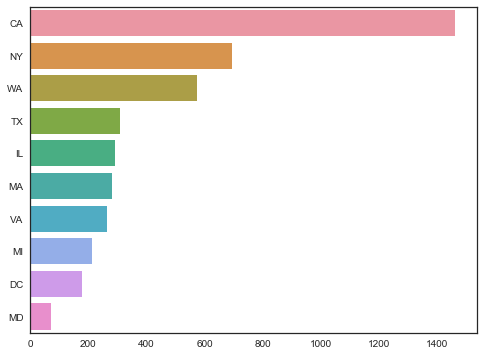

In [336]:
#Sample composition plot. As the sample is not random, can say nothing about population distribution.
g2  = sns.barplot(df.job_state_code.value_counts().values[:10], df.job_state_code.value_counts().index[:10]) #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

In [322]:
#df_size['size'] = df_size['size'].astype('category', ordered=True, categories=["['1', '50']","['51', '200']","['201', '500']",
#                    "['501', '1000']","['1001', '5000']","['5001', '10000']","['10000']"])

In [320]:
df_size.head()

,job_id,rating,position,company,job_city,job_state_code,sal_low,sal_high,link,description,hq_city,hq_state_code,size,industry,sal_mid
0,2875911862,4.8,"jr. data analyst - seattle, wa",AVID Technical Resources,Seattle,WA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"[on, growing, important, basic, candidates, wa...",Boston,MA,"['51', '200']",BusinessServices,NaN
1,2856266646,3.0,scientist,Perspecta,Herndon,VA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"[innovative, care, project, well, team., healt...",Chantilly,VA,['10000'],Aerospace&Defense,NaN
2,2854802616,4.4,"data scientist, engineering",Google,Seattle,WA,131.0,190.0,https://www.glassdoor.com/partner/jobListing.h...,"[technological, disciplinary, bruno, on, stora...",MountainView,CA,['10000'],InformationTechnology,160.5
3,2819879964,3.6,site reliability engineer,eBay Inc.,San Jose,CA,103.0,154.0,https://www.glassdoor.com/partner/jobListing.h...,"[use, monitoring, engineering, a, in, expert, ...",SanJose,CA,['10000'],Unknown,128.5
4,2839527260,4.0,data engineer,CyberCoders,San Francisco,CA,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,"[technical, hire., transformation, doing, data...",Irvine,CA,"['201', '500']",BusinessServices,NaN


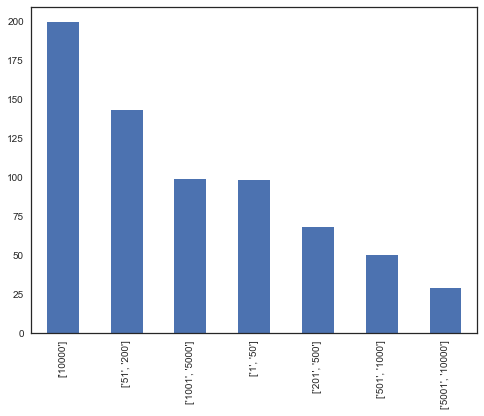

In [319]:
df_size[df_size.job_state_code=='NY']['size'].value_counts().plot(kind ='bar')

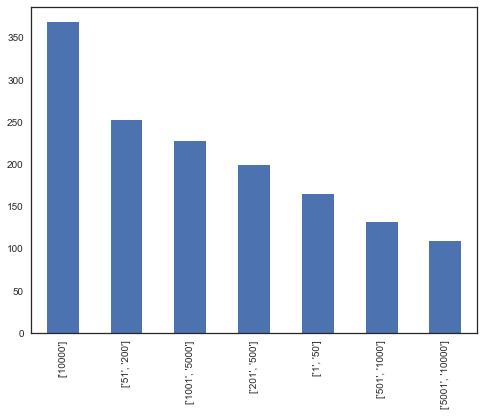

In [353]:
df_size[df_size.job_state_code=='CA']['size'].value_counts().plot(kind ='bar')
#labels = ['1000','51-200','1001-5000','b','c','d']
#plt.xticks(df_size, labels, rotation='horizontal')

In [354]:
#df_size[df_size.job_state_code=='NY']['size'].value_counts().loc[["['1', '50']","['51', '200']","['201', '500']",
#                    "['501', '1000']","['1001', '5000']","['5001', '10000']","['10000']" ]].plot(kind ='bar')

In [168]:
#df[df.job_state_code=='NY']['size'].value_counts().loc[["['1', '50']","['51', '200']","['201', '500']",
#                    "['501', '1000']","['1001', '5000']","['5001', '10000']","['10000']","[]" ]].plot(kind ='bar')

In [355]:
#df_size[df_size.job_state_code=='CA']['size'].value_counts().loc[["['1', '50']","['51', '200']","['201', '500']",
#                    "['501', '1000']","['1001', '5000']","['5001', '10000']","['10000']" ]].plot(kind ='bar')

In [70]:
df['industry'].unique(), len(df['industry'].unique())

(array(['BusinessServices', 'Aerospace&Defense', 'InformationTechnology',
        'Unknown', 'Biotech&Pharmaceuticals', 'Finance', 'Retail',
        'HealthCare', 'Arts,Entertainment&Recreation', 'Insurance',
        'Government', 'Travel&Tourism', 'Telecommunications',
        'Manufacturing', 'Education', 'Accounting&Legal', 'Media',
        'RealEstate', 'Non-Profit', 'Construction,Repair&Maintenance',
        'ConsumerServices', 'Oil,Gas,Energy&Utilities',
        'Restaurants,Bars&FoodServices', 'Transportation&Logistics',
        'Agriculture&Forestry'], dtype=object), 25)

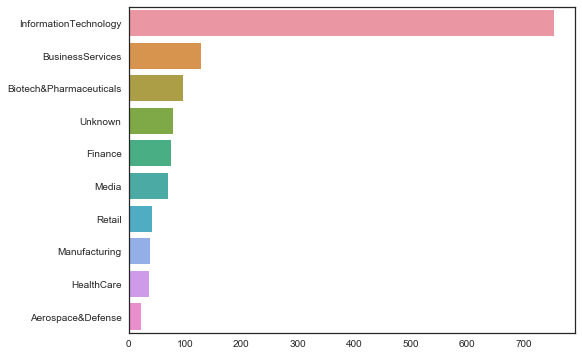

In [337]:
# California: which industry offeres most jobs?
g  = sns.barplot(df[df.job_state_code=='CA'].industry.value_counts().values[:10], 
                 df[df.job_state_code=='CA'].industry.value_counts().index[:10]) #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)

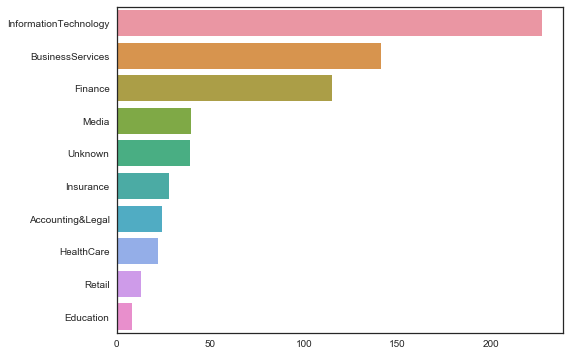

In [338]:
# New York: which industry offeres most jobs?
g  = sns.barplot(df[df.job_state_code=='NY'].industry.value_counts().values[:10], 
                 df[df.job_state_code=='NY'].industry.value_counts().index[:10]) #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [169]:
#g  = sns.barplot(df.industry.value_counts().index[:10], df.industry.value_counts().values[:10]) #top ten sectors
#dummy = g.set_xticklabels(g.get_xticklabels(), rotation=90)

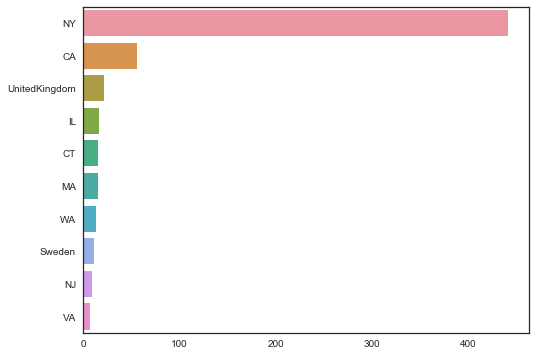

In [339]:
# HQ of companies offering jobs in NY
g2  = sns.barplot(df[df.job_state_code=='NY'].hq_state_code.value_counts().values[:10], 
                  df[df.job_state_code=='NY'].hq_state_code.value_counts().index[:10]) #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

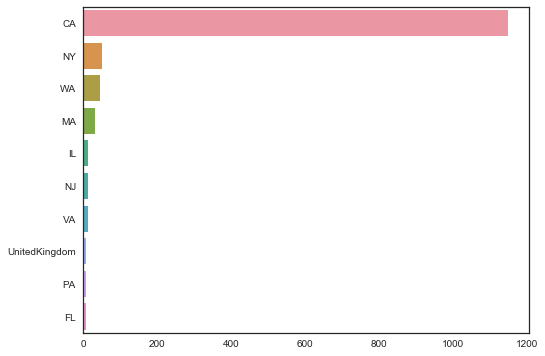

In [340]:
# HQ of companies offering jobs in CA
g2  = sns.barplot(df[df.job_state_code=='CA'].hq_state_code.value_counts().values[:10], 
                  df[df.job_state_code=='CA'].hq_state_code.value_counts().index[:10]) #top ten sectors
#dummy = g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

In [301]:
reduced_state_lst = ['CA','NY','OR','WA','DC','TX','GA','PA']
df_reduced = df[df.job_state_code.isin(reduced_state_lst)]
len(df_reduced)

3243

Text(0,0.5,'Salary (in thousand USDs) ')

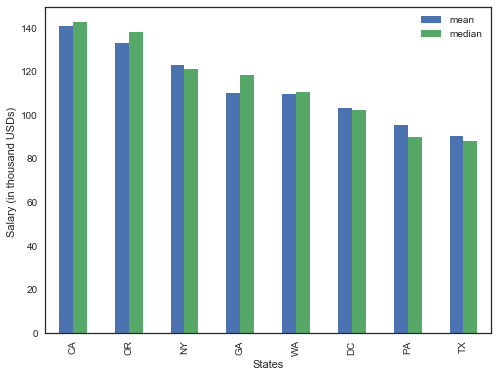

In [360]:
#MEAN SALARY FOR STATES (groupby state)
g2 = df_reduced.groupby('job_state_code').sal_mid.agg([np.mean,np.median]).sort_values(
    'mean', ascending = False).plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Salary (in thousand USDs) ')

In [304]:
#df.groupby('job_state_code').sal_high.agg([np.mean,np.median]).sort_values('mean', ascending = False).plot(kind='bar')

In [327]:
df.groupby('industry').sal_mid.mean()[:10].sort_values(ascending = False)

industry
ConsumerServices                   136.975000
Accounting&Legal                   128.853448
Finance                            120.723913
Biotech&Pharmaceuticals            120.421233
Agriculture&Forestry               117.142857
Construction,Repair&Maintenance    107.000000
Aerospace&Defense                  105.797619
BusinessServices                   100.747396
Arts,Entertainment&Recreation       94.928571
Education                           86.704545
Name: sal_mid, dtype: float64

Text(0,0.5,'Salary (in thousand USDs) ')

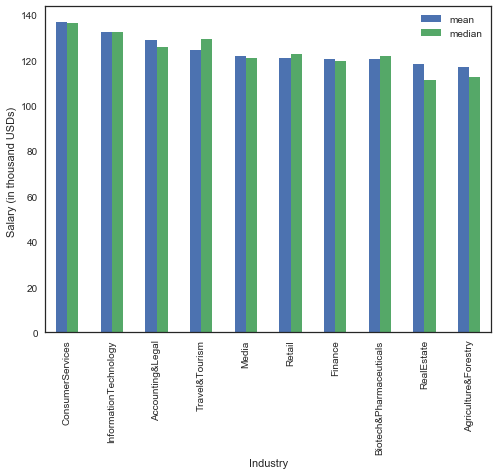

In [359]:
df.groupby('industry').sal_mid.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Salary (in thousand USDs) ')

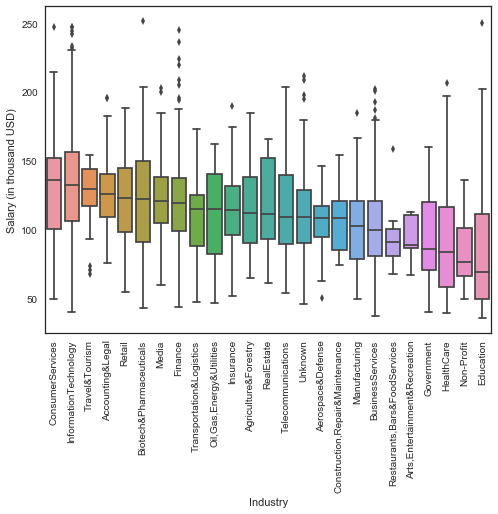

In [361]:
order=df.groupby('industry').median().sort_values(by='sal_mid', ascending = False).index.values
dummy = sns.boxplot(x=df.industry,y=df.sal_mid,data=df, order =order)
g = dummy.set_xticklabels(dummy.get_xticklabels(), rotation=90)
g2 =dummy.set(ylabel='Salary (in thousand USD)', xlabel='Industry')

Text(0,0.5,'Salary (in thousand USD)')

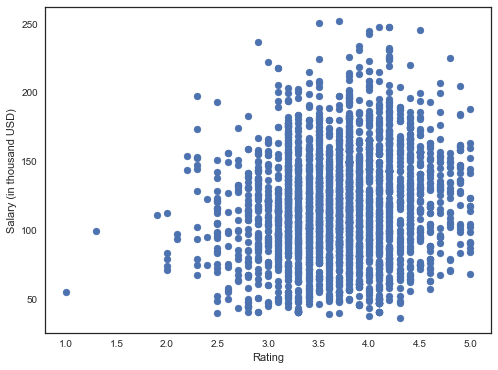

In [370]:
plt.scatter(x=df.rating, y= df.sal_mid, data = df)
plt.xlabel('Rating')
plt.ylabel('Salary (in thousand USD)')

In [306]:
#df.groupby('industry').sal_high.agg([np.mean,np.median]).sort_values('mean', ascending = False)[:10].plot(kind='bar')

In [328]:
#df.sal_mid.sort_values(ascending = False).plot(kind='box')

In [287]:
df.groupby('industry').median().sort_values(by='sal_mid')

,job_id,rating,sal_low,sal_high,sal_mid
industry,,,,,
Education,2827618482,4.10,53.5,86.0,69.00
Non-Profit,2845495237,4.10,60.5,92.5,76.75
HealthCare,2820995317,3.70,65.5,101.5,83.75
Government,2851156876,3.60,69.0,100.0,86.00
"Arts,Entertainment&Recreation",2814141761,3.40,80.0,104.0,89.00
"Restaurants,Bars&FoodServices",2850625681,3.60,71.5,108.5,91.25
BusinessServices,2830930141,3.70,81.5,118.0,100.00
Manufacturing,2837302579,3.75,84.0,122.0,103.00
"Construction,Repair&Maintenance",2842898151,3.40,86.0,131.0,108.50


Text(0.5,1,'Histogram of Salary')

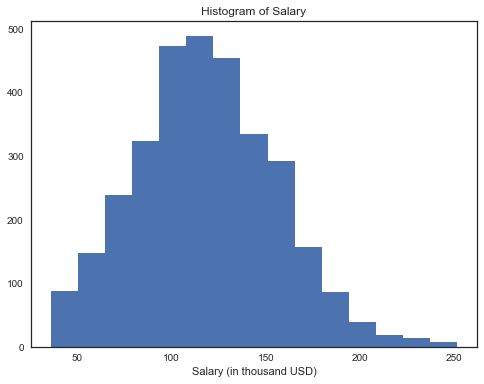

In [362]:
dummy  = plt.hist(df['sal_mid'].dropna(), bins =15)
plt.xlabel('Salary (in thousand USD)')
plt.ylabel('')
plt.title('Histogram of Salary')

Text(0.5,1,'Histogram of Rating')

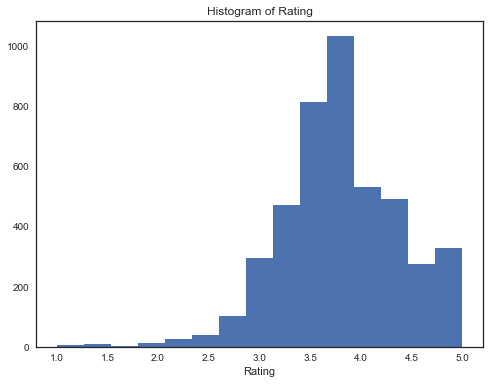

In [292]:
dummy  = plt.hist(df['rating'].dropna(), bins =15)
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Histogram of Rating')

In [331]:
#g = sns.stripplot(x="size", y=df.sal_mid, data=df_size)

In [88]:
from ast import literal_eval
df['description'] = df['description'].apply(literal_eval)

In [89]:
df.description.head()

0    [on, growing, important, basic, candidates, wa...
1    [innovative, care, project, well, team., healt...
2    [technological, disciplinary, bruno, on, stora...
3    [use, monitoring, engineering, a, in, expert, ...
4    [technical, hire., transformation, doing, data...
Name: description, dtype: object

In [94]:
df['description'].apply(lambda x: "hadoop" in x).head()

0    False
1    False
2    False
3    False
4    False
Name: description, dtype: bool

In [95]:
df['description'].apply(lambda x: "hadoop" in x).sum()

402

In [96]:
df['description'].apply(lambda x: "hadoop"  not in x).sum()

4138

In [176]:
def tool_freq(tool):
    return df['description'].apply(lambda x: tool in x).sum()

In [237]:
tools = ['python','r','java','c++','sql','excel','scala','stata','sas','spark','hadoop',
         'cloudera','mongodb','tableau','hive','tensorflow','django','aws','mahout','matlab','cassandra','mapreduce'] #'bokeh','clojure'
#tools = ['phd','masters','bachelor']

In [238]:
skill_dict = {}
for tool in tools:
    print(tool,' : ',tool_freq(tool))
    skill_dict[tool] = tool_freq(tool)

python  :  841
r  :  811
java  :  354
c++  :  189
sql  :  601
excel  :  181
scala  :  170
stata  :  18
sas  :  204
spark  :  380
hadoop  :  402
cloudera  :  10
mongodb  :  54
tableau  :  182
hive  :  154
tensorflow  :  85
django  :  7
aws  :  200
mahout  :  12
matlab  :  123
cassandra  :  47
mapreduce  :  74


In [239]:
skill_dict

{'aws': 200,
 'c++': 189,
 'cassandra': 47,
 'cloudera': 10,
 'django': 7,
 'excel': 181,
 'hadoop': 402,
 'hive': 154,
 'java': 354,
 'mahout': 12,
 'mapreduce': 74,
 'matlab': 123,
 'mongodb': 54,
 'python': 841,
 'r': 811,
 'sas': 204,
 'scala': 170,
 'spark': 380,
 'sql': 601,
 'stata': 18,
 'tableau': 182,
 'tensorflow': 85}

In [240]:
df_job = pd.DataFrame.from_dict(skill_dict, orient='index')
df_job

,0
c++,189
spark,380
r,811
django,7
mapreduce,74
java,354
tableau,182
sql,601
excel,181
mongodb,54


Text(0.5,1,'Frequency of skills')

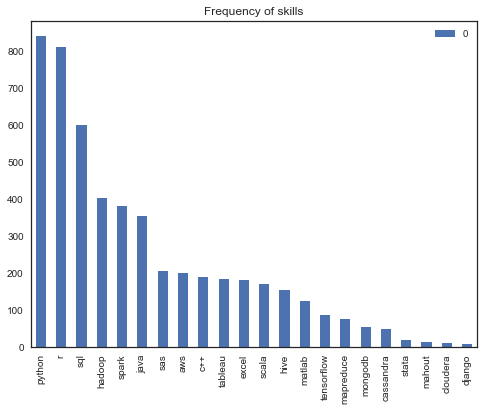

In [364]:
dummy = df_job.sort_values(by =0, ascending = False).plot(kind ='bar')
plt.title('Frequency of skills')

In [232]:
edus = ['phd','doctorate','doctor','masters','ms','bachelor','bs','undergrad','undergraduate','associate']

In [365]:
edu_dict = {}
for edu in edus:
    print(edu,' : ',tool_freq(edu))
    edu_dict[edu] = tool_freq(edu)

phd  :  356
doctorate  :  12
doctor  :  6
masters  :  277
ms  :  313
bachelor  :  206
bs  :  201
undergrad  :  0
undergraduate  :  25
associate  :  96


In [128]:
from wordcloud import WordCloud
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [134]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.append('etc')
stop.extend(['etc','inc'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(df['description'][0])
print(type(df['description'][0]))
len(df['description'][0])

In [ ]:
words = df.description.sum()
len(words)

In [ ]:
#words

In [140]:
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wc.generate(' '.join([x for x in words if x not in stop]))

In [366]:
#' '.join([x for x in words if x not in stop])

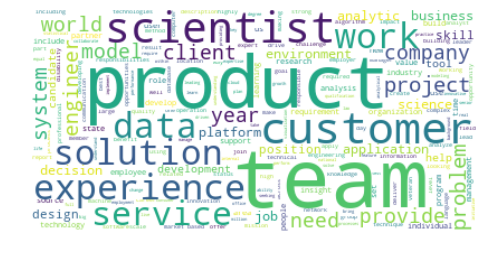

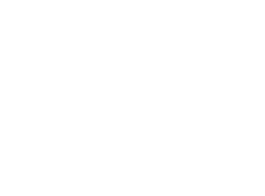

In [141]:
# show 
#Word cloud is pretty useless
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()